In [132]:
granger_causes = {'Convention Center': ['Indoor Entertainment',
  'Office',
  'Residence',
  'Store, Market & Fair',
  'Transportation',
  'Travel-Related Place'],
 'Electronics': ['General Education Place',
  'Indoor Entertainment',
  'Medical-Related Place',
  'Office',
  'Smoke Shop',
  'Store, Market & Fair',
  'Travel-Related Place'],
 'Factory': ['Convention Center',
  'Food & Snack',
  'Residence',
  'School',
  'Transportation',
  'Travel-Related Place',
  'Vehicle-Related Place'],
 'Food & Snack': ['Convention Center',
  'History, Museum & Arts',
  'Outdoor Entertainment',
  'Restaurant',
  'School',
  'Store, Market & Fair',
  'Transportation',
  'Travel-Related Place'],
 'General Education Place': ['Factory',
  'Hotel',
  'Indoor Entertainment',
  'Medical-Related Place',
  'School',
  'Smoke Shop',
  'Travel-Related Place'],
 'History, Museum & Arts': ['Convention Center',
  'Factory',
  'Residence',
  'School'],
 'Hotel': ['Factory'],
 'Indoor Entertainment': ['Food & Snack',
  'Office',
  'Place for Sports',
  'School',
  'Smoke Shop'],
 'Medical-Related Place': ['Factory',
  'General Education Place',
  'Rest Area',
  'Travel-Related Place'],
 'Neighborhood': ['Food & Snack',
  'History, Museum & Arts',
  'Place for Sports',
  'Restaurant',
  'Store, Market & Fair',
  'Transportation'],
 'Office': ['Factory',
  'Hotel',
  'Medical-Related Place',
  'Place for Sports',
  'Residence',
  'Vehicle-Related Place'],
 'Outdoor Entertainment': ['Place for Sports', 'Travel-Related Place'],
 'Place for Sports': ['Convention Center',
  'Office',
  'Outdoor Entertainment',
  'Rest Area',
  'Travel-Related Place'],
 'Residence': ['Factory',
  'Food & Snack',
  'History, Museum & Arts',
  'Indoor Entertainment',
  'Outdoor Entertainment',
  'Place for Sports',
  'School',
  'Travel-Related Place'],
 'Rest Area': ['Convention Center', 'Vehicle-Related Place'],
 'Restaurant': ['History, Museum & Arts',
  'Store, Market & Fair',
  'Vehicle-Related Place'],
 'School': ['General Education Place',
  'Hotel',
  'Office',
  'Residence',
  'Store, Market & Fair',
  'Transportation',
  'Travel-Related Place'],
 'Smoke Shop': ['Indoor Entertainment', 'School'],
 'Store, Market & Fair': ['Electronics',
  'Food & Snack',
  'General Education Place',
  'Neighborhood',
  'Outdoor Entertainment',
  'Residence',
  'Rest Area',
  'Transportation'],
 'Transportation': ['Place for Sports',
  'Travel-Related Place',
  'Vehicle-Related Place'],
 'Travel-Related Place': ['Convention Center',
  'Neighborhood',
  'Place for Sports'],
 'Vehicle-Related Place': ['Food & Snack', 'Office', 'Transportation']}

In [133]:
# 1-indexed
direct_causes = {
    'Vehicle-Related Place': [3,1],
    'Travel-Related Place': [2,],
    'Transportation': [3,2],
    'Store, Market & Fair': [6,4,5,2,3],
    'Smoke Shop': [1,],
    'School': [4,2,1],
    'Restaurant': [2,3],
    'Rest Area': [2,],
    'Residence': [5,3],
    'Place for Sports': [4,1],
    'Outdoor Entertainment': [2,],
    'Office': [4,1],
    'Neighborhood': [6,5],
    'Medical-Related Place': [2,4],
    'Indoor Entertainment': [2,],
    'Hotel': [1,],
    'History, Museum & Arts': [4,3],
    'General Education Place': [2,5,7],
    'Food & Snack': [6,7,3,5],
    'Factory': [2,],
    'Electronics': [3,4,2,5],
    'Convention Center': [5,3]
}
# 0-indexed
direct_causes = {key:[i-1 for i in val] for key,val in direct_causes.items()}
print(direct_causes)

{'Vehicle-Related Place': [2, 0], 'Travel-Related Place': [1], 'Transportation': [2, 1], 'Store, Market & Fair': [5, 3, 4, 1, 2], 'Smoke Shop': [0], 'School': [3, 1, 0], 'Restaurant': [1, 2], 'Rest Area': [1], 'Residence': [4, 2], 'Place for Sports': [3, 0], 'Outdoor Entertainment': [1], 'Office': [3, 0], 'Neighborhood': [5, 4], 'Medical-Related Place': [1, 3], 'Indoor Entertainment': [1], 'Hotel': [0], 'History, Museum & Arts': [3, 2], 'General Education Place': [1, 4, 6], 'Food & Snack': [5, 6, 2, 4], 'Factory': [1], 'Electronics': [2, 3, 1, 4], 'Convention Center': [4, 2]}


In [134]:
for key in direct_causes: assert(key in granger_causes)
for key in granger_causes: assert(key in direct_causes)

In [135]:
print(len(direct_causes))

22


{'Vehicle-Related Place': Text(0.028409880027234335, -0.28961124752262757, 'Vehicle-Related Place'),
 'Travel-Related Place': Text(0.008441326511270771, 0.10176381781493347, 'Travel-Related Place'),
 'Transportation': Text(0.03931798378132091, -0.06621407175990371, 'Transportation'),
 'Store, Market & Fair': Text(-0.03877384405048305, -0.5287465900862528, 'Store, Market & Fair'),
 'Smoke Shop': Text(-0.11125131857807634, 0.5902088941920361, 'Smoke Shop'),
 'School': Text(0.029167966068628835, -0.13993343567954186, 'School'),
 'Restaurant': Text(-0.04475511689666578, -0.97, 'Restaurant'),
 'Rest Area': Text(0.09523016095832439, 0.3603996830898273, 'Rest Area'),
 'Residence': Text(0.05710064477857536, -0.15903713625455457, 'Residence'),
 'Place for Sports': Text(0.009056965088033584, 0.3309519708418338, 'Place for Sports'),
 'Outdoor Entertainment': Text(-0.013886261135392302, -0.33336922648342837, 'Outdoor Entertainment'),
 'Office': Text(-0.036480164550145744, 0.35383252663616194, 'Off

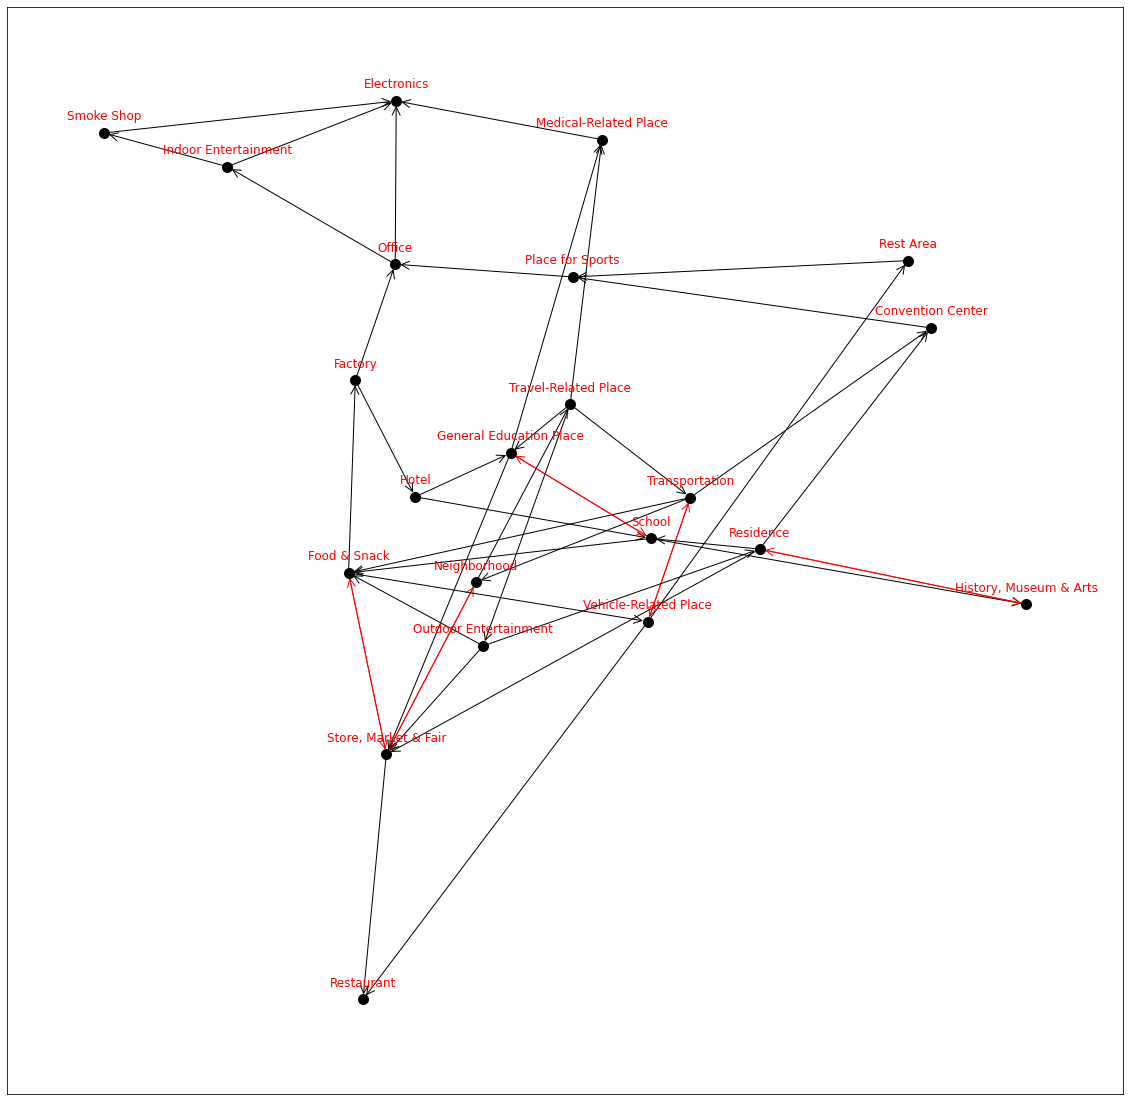

In [140]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

G = nx.DiGraph(directed=True)
G.add_nodes_from(list(direct_causes.keys()))
cause_list=[(granger_causes[k][c_idx],k) for k,v in direct_causes.items() for c_idx in v]
G.add_edges_from(cause_list)
edges=list(G.edges)
edge_colors=[]
for e in edges:
    if (e[1],e[0]) in edges: edge_colors.append('red')
    else: edge_colors.append('black') 
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 1,
    'arrowstyle': '->',
    'arrowsize': 20,
    'font_color': 'blue',
    'font_size': 10,
}
plt.figure(1,figsize=(20,20))
# seed=np.random.randint(0,1e6) # 310916, 883881
# print(seed)
my_pos = nx.spring_layout(G, seed = 883881)
pos_nodes = nudge(my_pos, 0, 0.03) 
# nx.draw_networkx(G, pos=my_pos, arrows=True, with_labels=True, **options)
nx.draw_networkx(G, pos=my_pos, arrows=True, with_labels=False, edge_color=edge_colors, **options)
nx.draw_networkx_labels(G, pos=pos_nodes,font_color='red')

In [ ]:
nx.is_directed_acyclic_graph(G)

False

In [ ]:
edges=list(G.edges)
for e in edges:
    if (e[1],e[0]) in edges:
        print(e)
# ('Vehicle-Related Place', 'Transportation')
# ('Store, Market & Fair', 'Neighborhood')
# ('Store, Market & Fair', 'Food & Snack')
# ('School', 'General Education Place')
# ('Residence', 'History, Museum & Arts')

('Vehicle-Related Place', 'Transportation')
('Transportation', 'Vehicle-Related Place')
('Store, Market & Fair', 'Neighborhood')
('Store, Market & Fair', 'Food & Snack')
('School', 'General Education Place')
('Residence', 'History, Museum & Arts')
('Neighborhood', 'Store, Market & Fair')
('History, Museum & Arts', 'Residence')
('General Education Place', 'School')
('Food & Snack', 'Store, Market & Fair')
